In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")
%matplotlib inline

# Load dataset
df = pd.read_csv("Zomato-data-.csv")

# Display basic info
print("Shape:", df.shape)
df.head()


Shape: (148, 7)


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [16]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Clean the 'rate' column
def handle_rate(value):
    try:
        value = str(value).split('/')[0].strip()
        return float(value) if value not in ['NEW', '-', 'nan'] else np.nan
    except:
        return np.nan

df['rate'] = df['rate'].apply(handle_rate)

# Remove commas and convert cost to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '').str.strip()
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Fill missing values
df.fillna({
    'rate': df['rate'].mean(),
    'approx_cost(for two people)': df['approx_cost(for two people)'].mean()
}, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## **Online vs Offline Delivery**

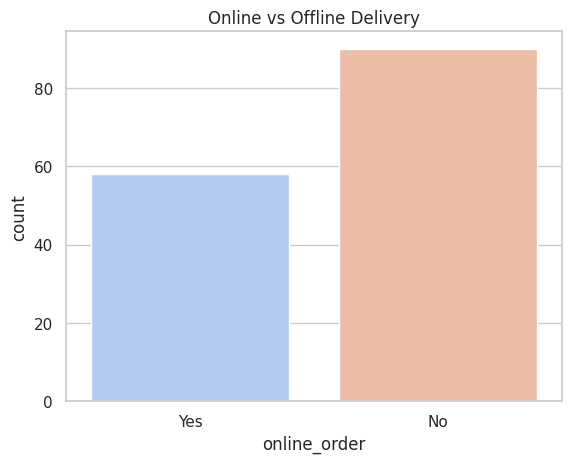

In [17]:
sns.countplot(x='online_order', data=df, hue='online_order', palette='coolwarm', legend=False)
plt.title("Online vs Offline Delivery")
plt.show()

## **Most Favored Restaurant Types**

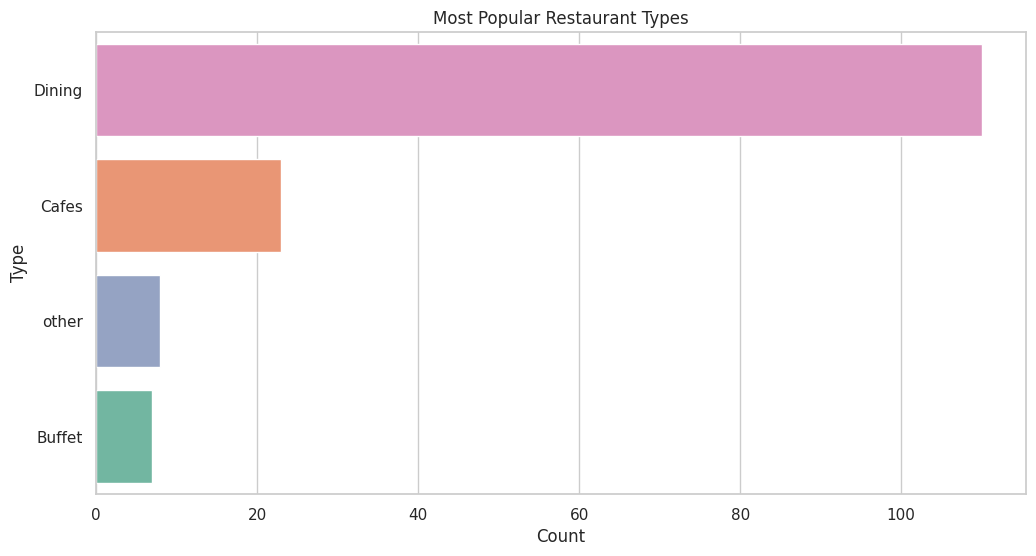

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(y='listed_in(type)', data=df, order=df['listed_in(type)'].value_counts().index, palette='Set2', hue='listed_in(type)', legend=False)
plt.title("Most Popular Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

## **Couples’ Preferred Price Range**

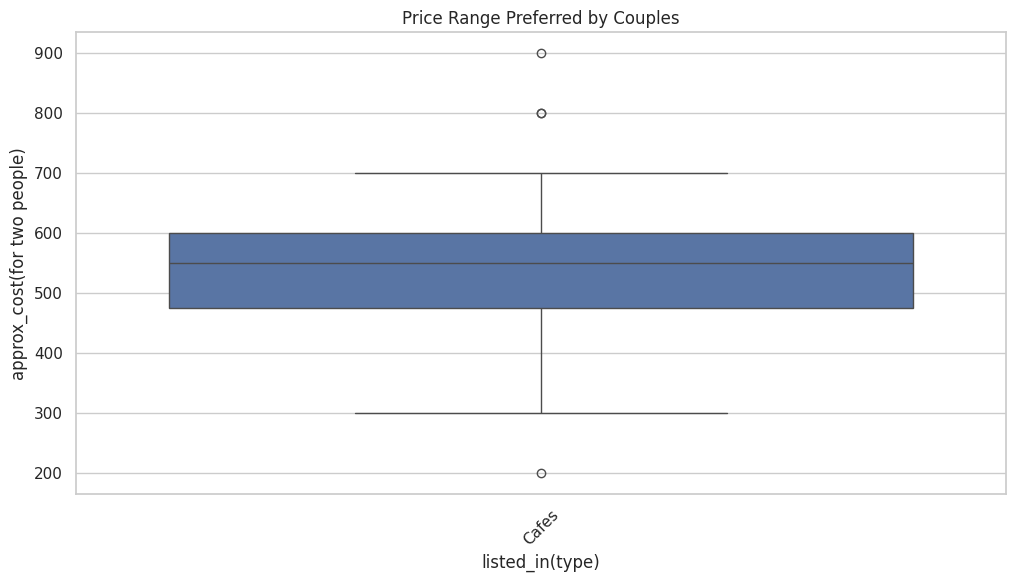

In [19]:
# Filter cafes and fine dining places
romantic_df = df[df['listed_in(type)'].str.contains("Caf|Casual|Fine", case=False, na=False)]

plt.figure(figsize=(12,6))
sns.boxplot(x='listed_in(type)', y='approx_cost(for two people)', data=romantic_df)
plt.title("Price Range Preferred by Couples")
plt.xticks(rotation=45)
plt.show()


## **Average Rating by Restaurant Type**

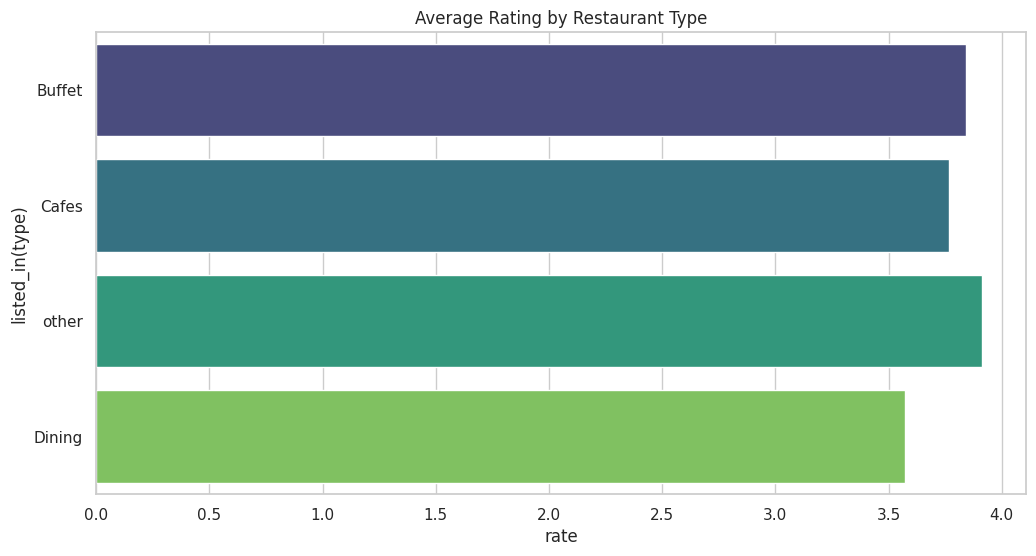

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='rate', y='listed_in(type)', data=df, estimator=np.mean, errorbar=None, palette='viridis', hue='listed_in(type)', legend=False)
plt.title("Average Rating by Restaurant Type")
plt.show()

## **Votes vs Cost Correlation**

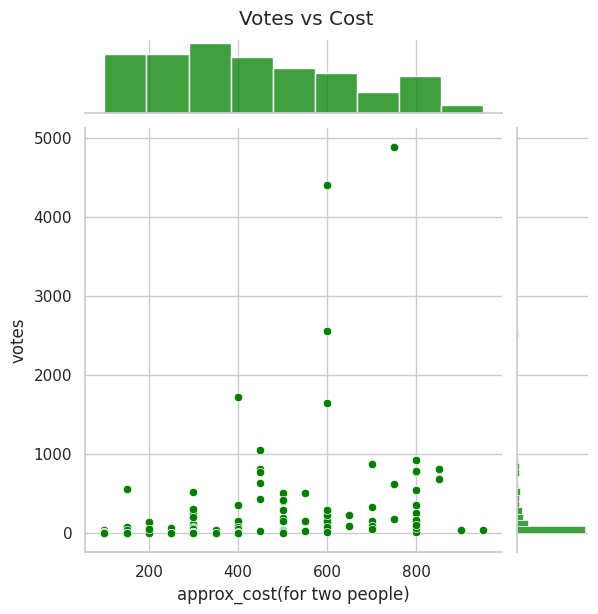

In [21]:
sns.jointplot(data=df, x='approx_cost(for two people)', y='votes', kind='scatter', color='green')
plt.suptitle("Votes vs Cost", y=1.02)
plt.show()

The analysis shows that online delivery, casual dining, and moderately priced North Indian and Chinese cuisines are most preferred by customers. These insights can guide strategic decisions in the food industry.
